In [13]:
import numpy as np
from sksurv.linear_model import CoxPHSurvivalAnalysis
import matplotlib.pyplot as plt

In [14]:
Y = 5*np.random.rand(100) + 30
D = np.random.randint(0,2,100)

c_vec = np.array([((1-D[i]), Y[i]) for i in
                      range(len(Y))], dtype=[('e', bool), ('t', float)])

X = np.random.randn(100, 2)
mod = CoxPHSurvivalAnalysis(alpha=0.)

mod.fit(X,c_vec)

CoxPHSurvivalAnalysis(alpha=0.0)

In [15]:
Xtest = np.random.randn(100, 2)
Ytest = 5*np.random.rand(100) + 30

0.08966732693855188


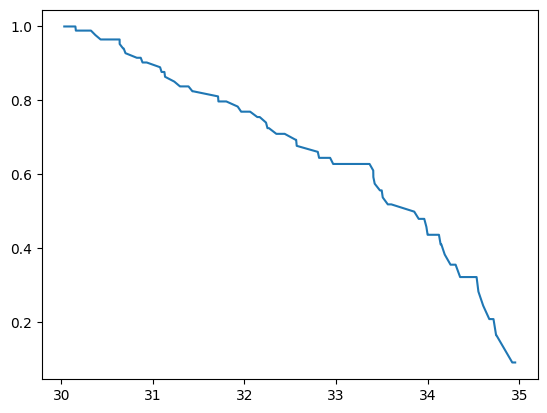

In [24]:
sfun = mod.predict_survival_function(Xtest)[2]
plt.plot(sfun.x,[sfun(x_)  for x_ in sfun.x])


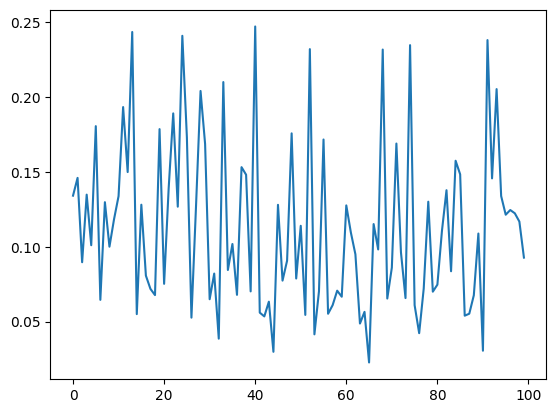

In [26]:
last_survival = []
for i in range(len(Xtest)):
    sfun = mod.predict_survival_function(Xtest)[i]
    last_survival.append(sfun(sfun.x[-1]))
plt.plot(last_survival)

In [13]:
from src import LOG_DIR
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open(os.path.join(LOG_DIR, 'models', f'censoring_model0_0.pkl'), 'rb') as handle:
    censoring_model0_S0 = pickle.load(handle)
with open(os.path.join(LOG_DIR, 'models', f'censoring_model0_1.pkl'), 'rb') as handle:
    censoring_model0_S1 = pickle.load(handle)
with open(os.path.join(LOG_DIR, 'models', f'censoring_model1_0.pkl'), 'rb') as handle:
    censoring_model1_S0 = pickle.load(handle)
with open(os.path.join(LOG_DIR, 'models', f'censoring_model1_1.pkl'), 'rb') as handle:
    censoring_model1_S1 = pickle.load(handle)

In [17]:
preds00 = censoring_model0_S0.predict(np.zeros(4), return_array = False)[0]
preds01 = censoring_model0_S1.predict(np.zeros(4), return_array = False)[0]
preds10 = censoring_model1_S0.predict(np.zeros(4), return_array = False)[0]
preds11 = censoring_model1_S1.predict(np.zeros(4), return_array = False)[0]

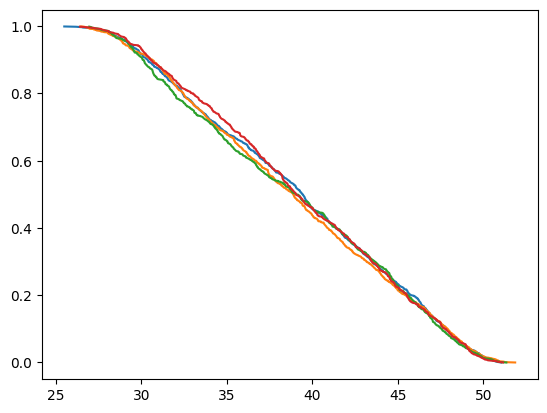

In [18]:
plt.plot(preds00.x,preds00.y, label = "Treat 0 - S0")
plt.plot(preds01.x,preds01.y, label = "Treat 0 - S0")
plt.plot(preds10.x,preds10.y, label = "Treat 0 - S0")
plt.plot(preds11.x,preds11.y, label = "Treat 0 - S0")